<a href="https://colab.research.google.com/github/Hrotich/AUTOLIB-CORE-IP/blob/main/HARON_ROTICH_CORE_WEEK_4_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HYPOTHESIS TESTING IP WORKINGS

1. Defining the Question

a) Specifying the Question
investigate a claim about the blue cars from the provided Autolib dataset.

b) Defining the Metric for Success


c) Understanding the context

d) Recording the Experimental Design


In [2]:
# importing libaraies that we would require
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [127]:
# to read the dataset
df = pd.read_csv("/content/autolib_daily_events_postal_code.csv")


In [6]:
# to pre-view dataset top part
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [128]:
# to preview the bottom part of the data 
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [13]:
# to check on the number of records  in our data
df.shape
print (str(df.shape[0]) + ' rows, and ' + str(df.shape[1]) + ' columns')

16085 rows, and 13 columns


In [14]:
 #Checking  appropriateness of datatype in each column
#
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

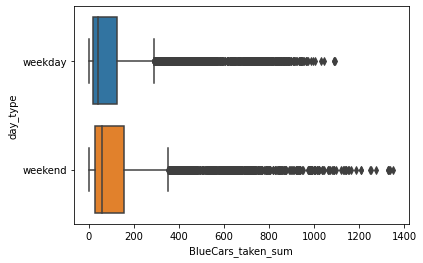

In [28]:
# to check for outliers
sns.boxplot(y='day_type', x='BlueCars_taken_sum',data=df)


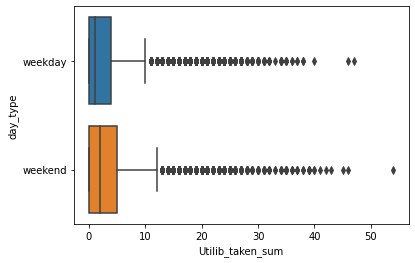

In [30]:
# to check for  auliers
sns.boxplot(y='day_type', x='Utilib_taken_sum',data=df)

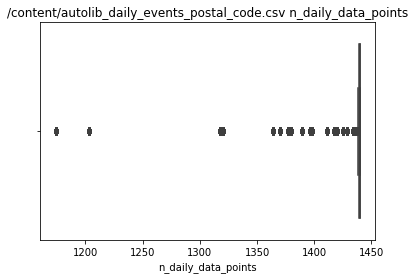

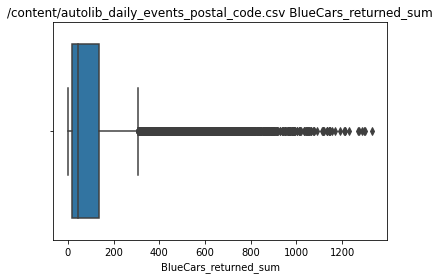

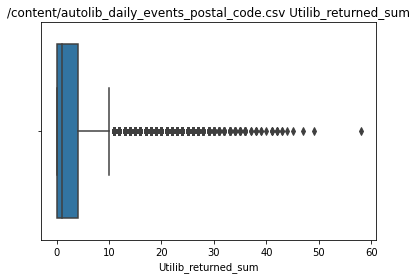

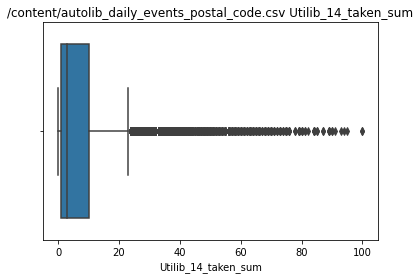

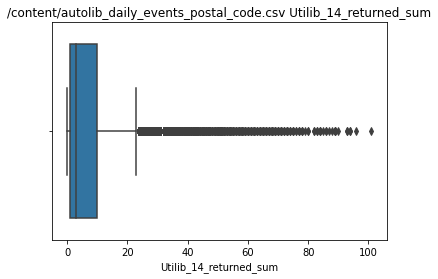

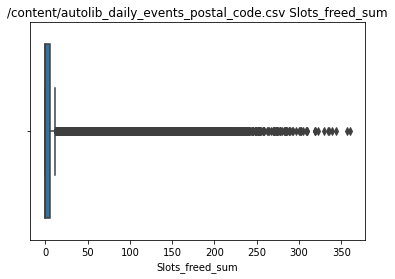

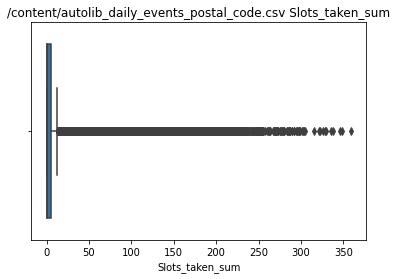

In [34]:
def boxplot(column):
    sns.boxplot(data=df,x=df[f"{column}"])
    plt.title(f"/content/autolib_daily_events_postal_code.csv {column}")
    plt.show()

boxplot('n_daily_data_points')
boxplot('BlueCars_returned_sum')
boxplot('Utilib_returned_sum')
boxplot('Utilib_14_taken_sum')
boxplot('Utilib_14_returned_sum')
boxplot('Slots_freed_sum')
boxplot('Slots_taken_sum')


In [50]:
# to check for missing data
df.isnull().values.any()

False

In [51]:
##check for duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16080    False
16081    False
16082    False
16083    False
16084    False
Length: 16085, dtype: bool

In [130]:
# to count number of missing data
num_rows = df.shape[0]
num_missing = num_rows - df.count() 
num_missing

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [133]:
# to check on more data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [132]:
# to check on data description
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


EXPLORATORY DATA ANALYSIS

UNIVARIATE ANALYSIS


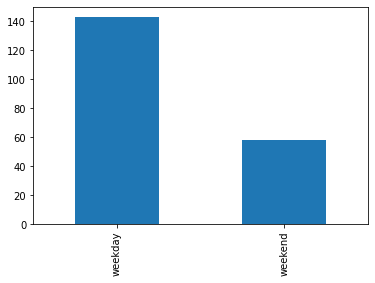

In [110]:
# To plot univariate summaries
df_sample['day_type'].value_counts().head(20).plot.bar()

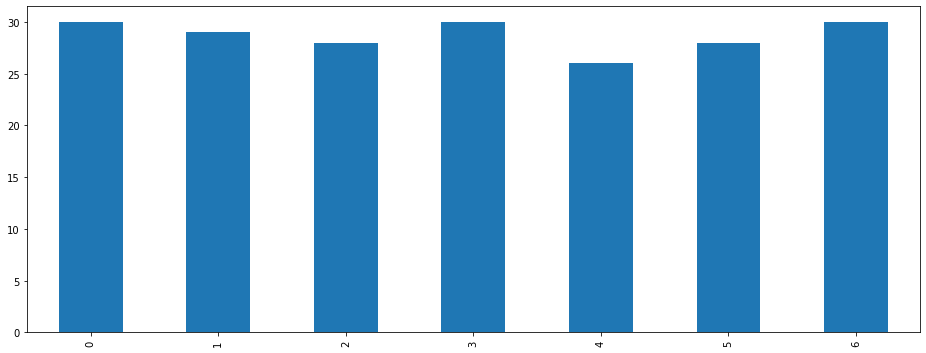

In [140]:
# to plot barchart on n_daily_data_points
fig = plt.figure(figsize=(16, 6))
df_sample['dayOfWeek'].value_counts().sort_index().plot.bar()

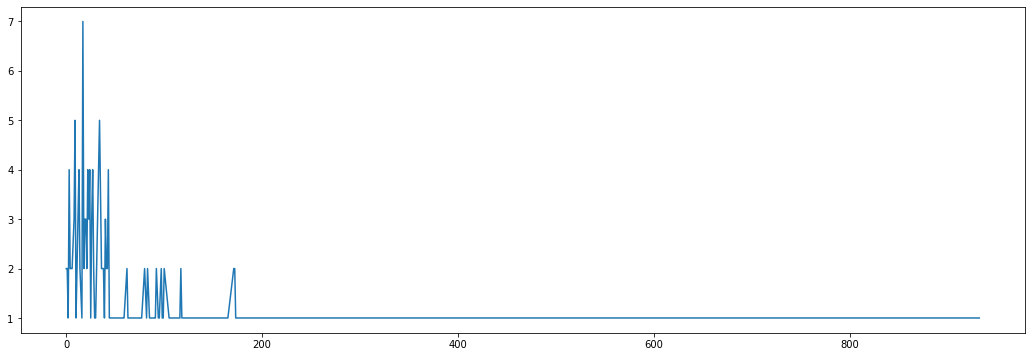

In [111]:
# to plotbarchart on
fig = plt.figure(figsize=(18, 6))
df_sample['BlueCars_taken_sum'].value_counts().sort_index().plot.line()

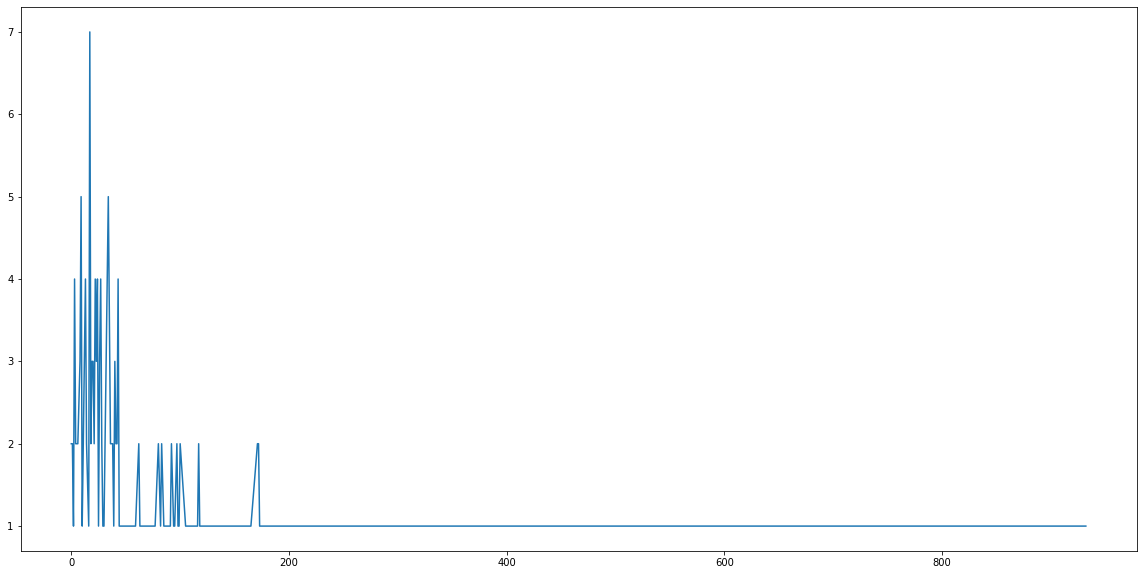

In [112]:

fig = plt.figure(figsize=(20, 10))
df_sample['BlueCars_taken_sum'].value_counts().sort_index().plot.line()


In [ ]:
#



MEASURES OF CENTRAL TENDENCY


In [141]:
#To find mean for numeric columns

print(df[['n_daily_data_points', 'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum','Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum']].mean())

n_daily_data_points       1431.330619
BlueCars_taken_sum         125.926951
BlueCars_returned_sum      125.912714
Utilib_taken_sum             3.698290
Utilib_returned_sum          3.699099
Utilib_14_taken_sum          8.600560
Utilib_14_returned_sum       8.599192
Slots_freed_sum             22.629033
Slots_taken_sum             22.629282
dtype: float64


In [143]:
print(df_sample[['n_daily_data_points', 'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum','Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum']].mean())

n_daily_data_points       1428.681592
BlueCars_taken_sum         127.238806
BlueCars_returned_sum      127.159204
Utilib_taken_sum             3.781095
Utilib_returned_sum          3.716418
Utilib_14_taken_sum          9.318408
Utilib_14_returned_sum       9.278607
Slots_freed_sum             23.014925
Slots_taken_sum             22.960199
dtype: float64


In [114]:
#to find median  
print(df_sample[['n_daily_data_points', 'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum','Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum']].median())


n_daily_data_points       1440.0
BlueCars_taken_sum          42.0
BlueCars_returned_sum       43.0
Utilib_taken_sum             1.0
Utilib_returned_sum          1.0
Utilib_14_taken_sum          4.0
Utilib_14_returned_sum       3.0
Slots_freed_sum              0.0
Slots_taken_sum              0.0
dtype: float64


In [115]:
# to find mode
df_sample.mode()


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/13/2018,1440.0,0.0,weekday,17.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0
1,75002,1/26/2018,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,75003,1/30/2018,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75004,1/5/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75005,2/17/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,94500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,94700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,94800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,95100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Measure of spread

In [144]:
# to get standaerd deviation
df.std()


Postal code               7647.342000
n_daily_data_points         33.212050
dayOfWeek                    2.008378
BlueCars_taken_sum         185.426579
BlueCars_returned_sum      185.501535
Utilib_taken_sum             5.815058
Utilib_returned_sum          5.824634
Utilib_14_taken_sum         12.870098
Utilib_14_returned_sum      12.868993
Slots_freed_sum             52.120263
Slots_taken_sum             52.146030
dtype: float64

In [108]:
# to find variance
df_sample.var()

Postal code               5.881560e+07
n_daily_data_points       1.519838e+03
dayOfWeek                 4.109602e+00
BlueCars_taken_sum        3.491169e+04
BlueCars_returned_sum     3.463463e+04
Utilib_taken_sum          4.038184e+01
Utilib_returned_sum       3.708418e+01
Utilib_14_taken_sum       2.046181e+02
Utilib_14_returned_sum    2.016720e+02
Slots_freed_sum           2.780835e+03
Slots_taken_sum           2.751908e+03
dtype: float64

In [107]:
# to find skewness
df_sample.skew()

Postal code              -1.170972
n_daily_data_points      -4.802243
dayOfWeek                 0.023685
BlueCars_taken_sum        2.218077
BlueCars_returned_sum     2.241031
Utilib_taken_sum          3.046761
Utilib_returned_sum       2.921578
Utilib_14_taken_sum       2.445964
Utilib_14_returned_sum    2.574279
Slots_freed_sum           2.521782
Slots_taken_sum           2.529962
dtype: float64

In [106]:
# to test for kurtosis
df_sample.kurt()

Postal code               -0.544415
n_daily_data_points       24.878143
dayOfWeek                 -1.267839
BlueCars_taken_sum         4.566153
BlueCars_returned_sum      4.752705
Utilib_taken_sum          10.803274
Utilib_returned_sum       10.038904
Utilib_14_taken_sum        6.151252
Utilib_14_returned_sum     7.401873
Slots_freed_sum            5.511626
Slots_taken_sum            5.615931
dtype: float64

BIVARIATE  ANALYSIS

Text(0.5, 1.0, 'BlueCars_taken_sum vs Postal code')

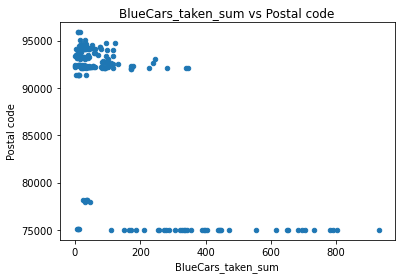

In [105]:
# Plotting our scatterplot to compare the variables
df_sample.plot(x = 'BlueCars_taken_sum', y = 'Postal code', kind='scatter')
# naming our scatterplot a title
plt.title('BlueCars_taken_sum vs Postal code')



Text(0.5, 1.0, 'BlueCars_returned_sum vs Postal code')

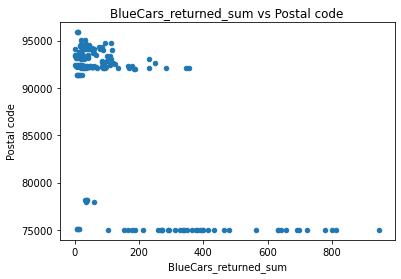

In [104]:
# tp plot scatter
df_sample.plot(x = 'BlueCars_returned_sum', y = 'Postal code', kind='scatter')
plt.title('BlueCars_returned_sum vs Postal code')


Text(0, 0.5, 'Postal_code')

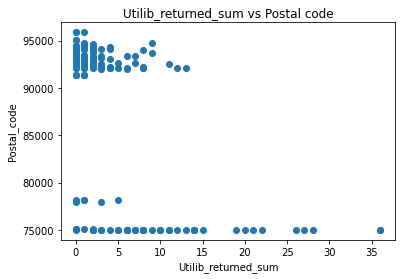

In [103]:
# to plot scatter
plt.scatter(df_sample["Utilib_returned_sum"] , df_sample["Postal code"])
# naming our scatterplot a title
plt.title('Utilib_returned_sum vs Postal code')

# Labelling our x axis
plt.xlabel('Utilib_returned_sum')

# Labelling our y axis
plt.ylabel('Postal_code')


Text(0, 0.5, 'Postal_code')

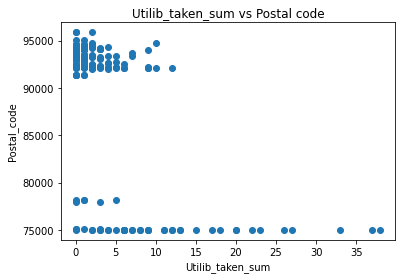

In [102]:
# to plot scatter
plt.scatter(df_sample["Utilib_taken_sum"] , df_sample["Postal code"])
# naming our scatterplot a title
plt.title('Utilib_taken_sum vs Postal code')

# Labelling our x axis
plt.xlabel('Utilib_taken_sum')

# Labelling our y axis
plt.ylabel('Postal_code')


In [100]:
# Calculating the pearson coefficient
pearson_coeff = df_sample["BlueCars_taken_sum"].corr(df["Postal code"], method="pearson") 

# Checking whether you have to define the pearson
coeff = df_sample["BlueCars_taken_sum"].corr(df["Postal code"]) 
print(coeff)

-0.7126309902151051


In [99]:
# To calculate the pearson coefficient
pearson_coeff = df_sample["BlueCars_taken_sum"].corr(df["BlueCars_returned_sum"], method="pearson") 

# Checking whether you have to define the pearson
coeff = df_sample["BlueCars_taken_sum"].corr(df["BlueCars_returned_sum"]) 
print(coeff)

0.9989961754232205


In [98]:

# To calculate the pearson coefficient
pearson_coeff = df_sample["Utilib_taken_sum"].corr(df["BlueCars_returned_sum"], method="pearson") 

# Checking whether you have to define the pearson
coeff = df_sample["Utilib_taken_sum"].corr(df["BlueCars_returned_sum"]) 
print(coeff)



0.887002957130141


In [97]:
#To calculate the pearson coefficient
pearson_coeff = df_sample["Utilib_taken_sum"].corr(df["Postal code"], method="pearson") 

# Checking whether you have to define the pearson
coeff = df_sample["Utilib_taken_sum"].corr(df["Postal code"]) 
print(coeff)

-0.5874237639594075


In [96]:
#To calculate the pearson coefficient
pearson_coeff = df_sample["Utilib_taken_sum"].corr(df["n_daily_data_points"], method="pearson") 

# Checking whether you have to define the pearson
coeff = df_sample["Utilib_taken_sum"].corr(df["Postal code"]) 
print(coeff)


-0.5874237639594075


In [39]:
#To calculate the pearson coefficient
pearson_coeff = df["BlueCars_taken_sum"].corr(df["dayOfWeek"], method="pearson") 

# Checking whether you have to define the pearson
coeff = df["BlueCars_taken_sum"].corr(df["dayOfWeek"]) 
print(coeff)

0.07964926759308416


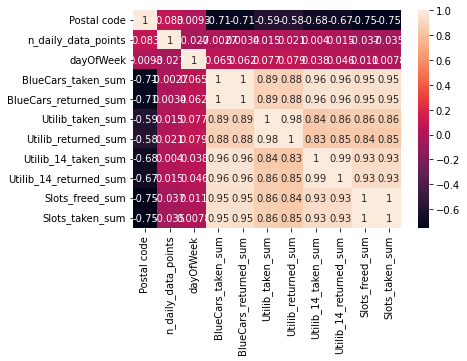

In [95]:
# to plot heat map for our data
sns.heatmap(df_sample.corr(),annot=True)
plt.show()

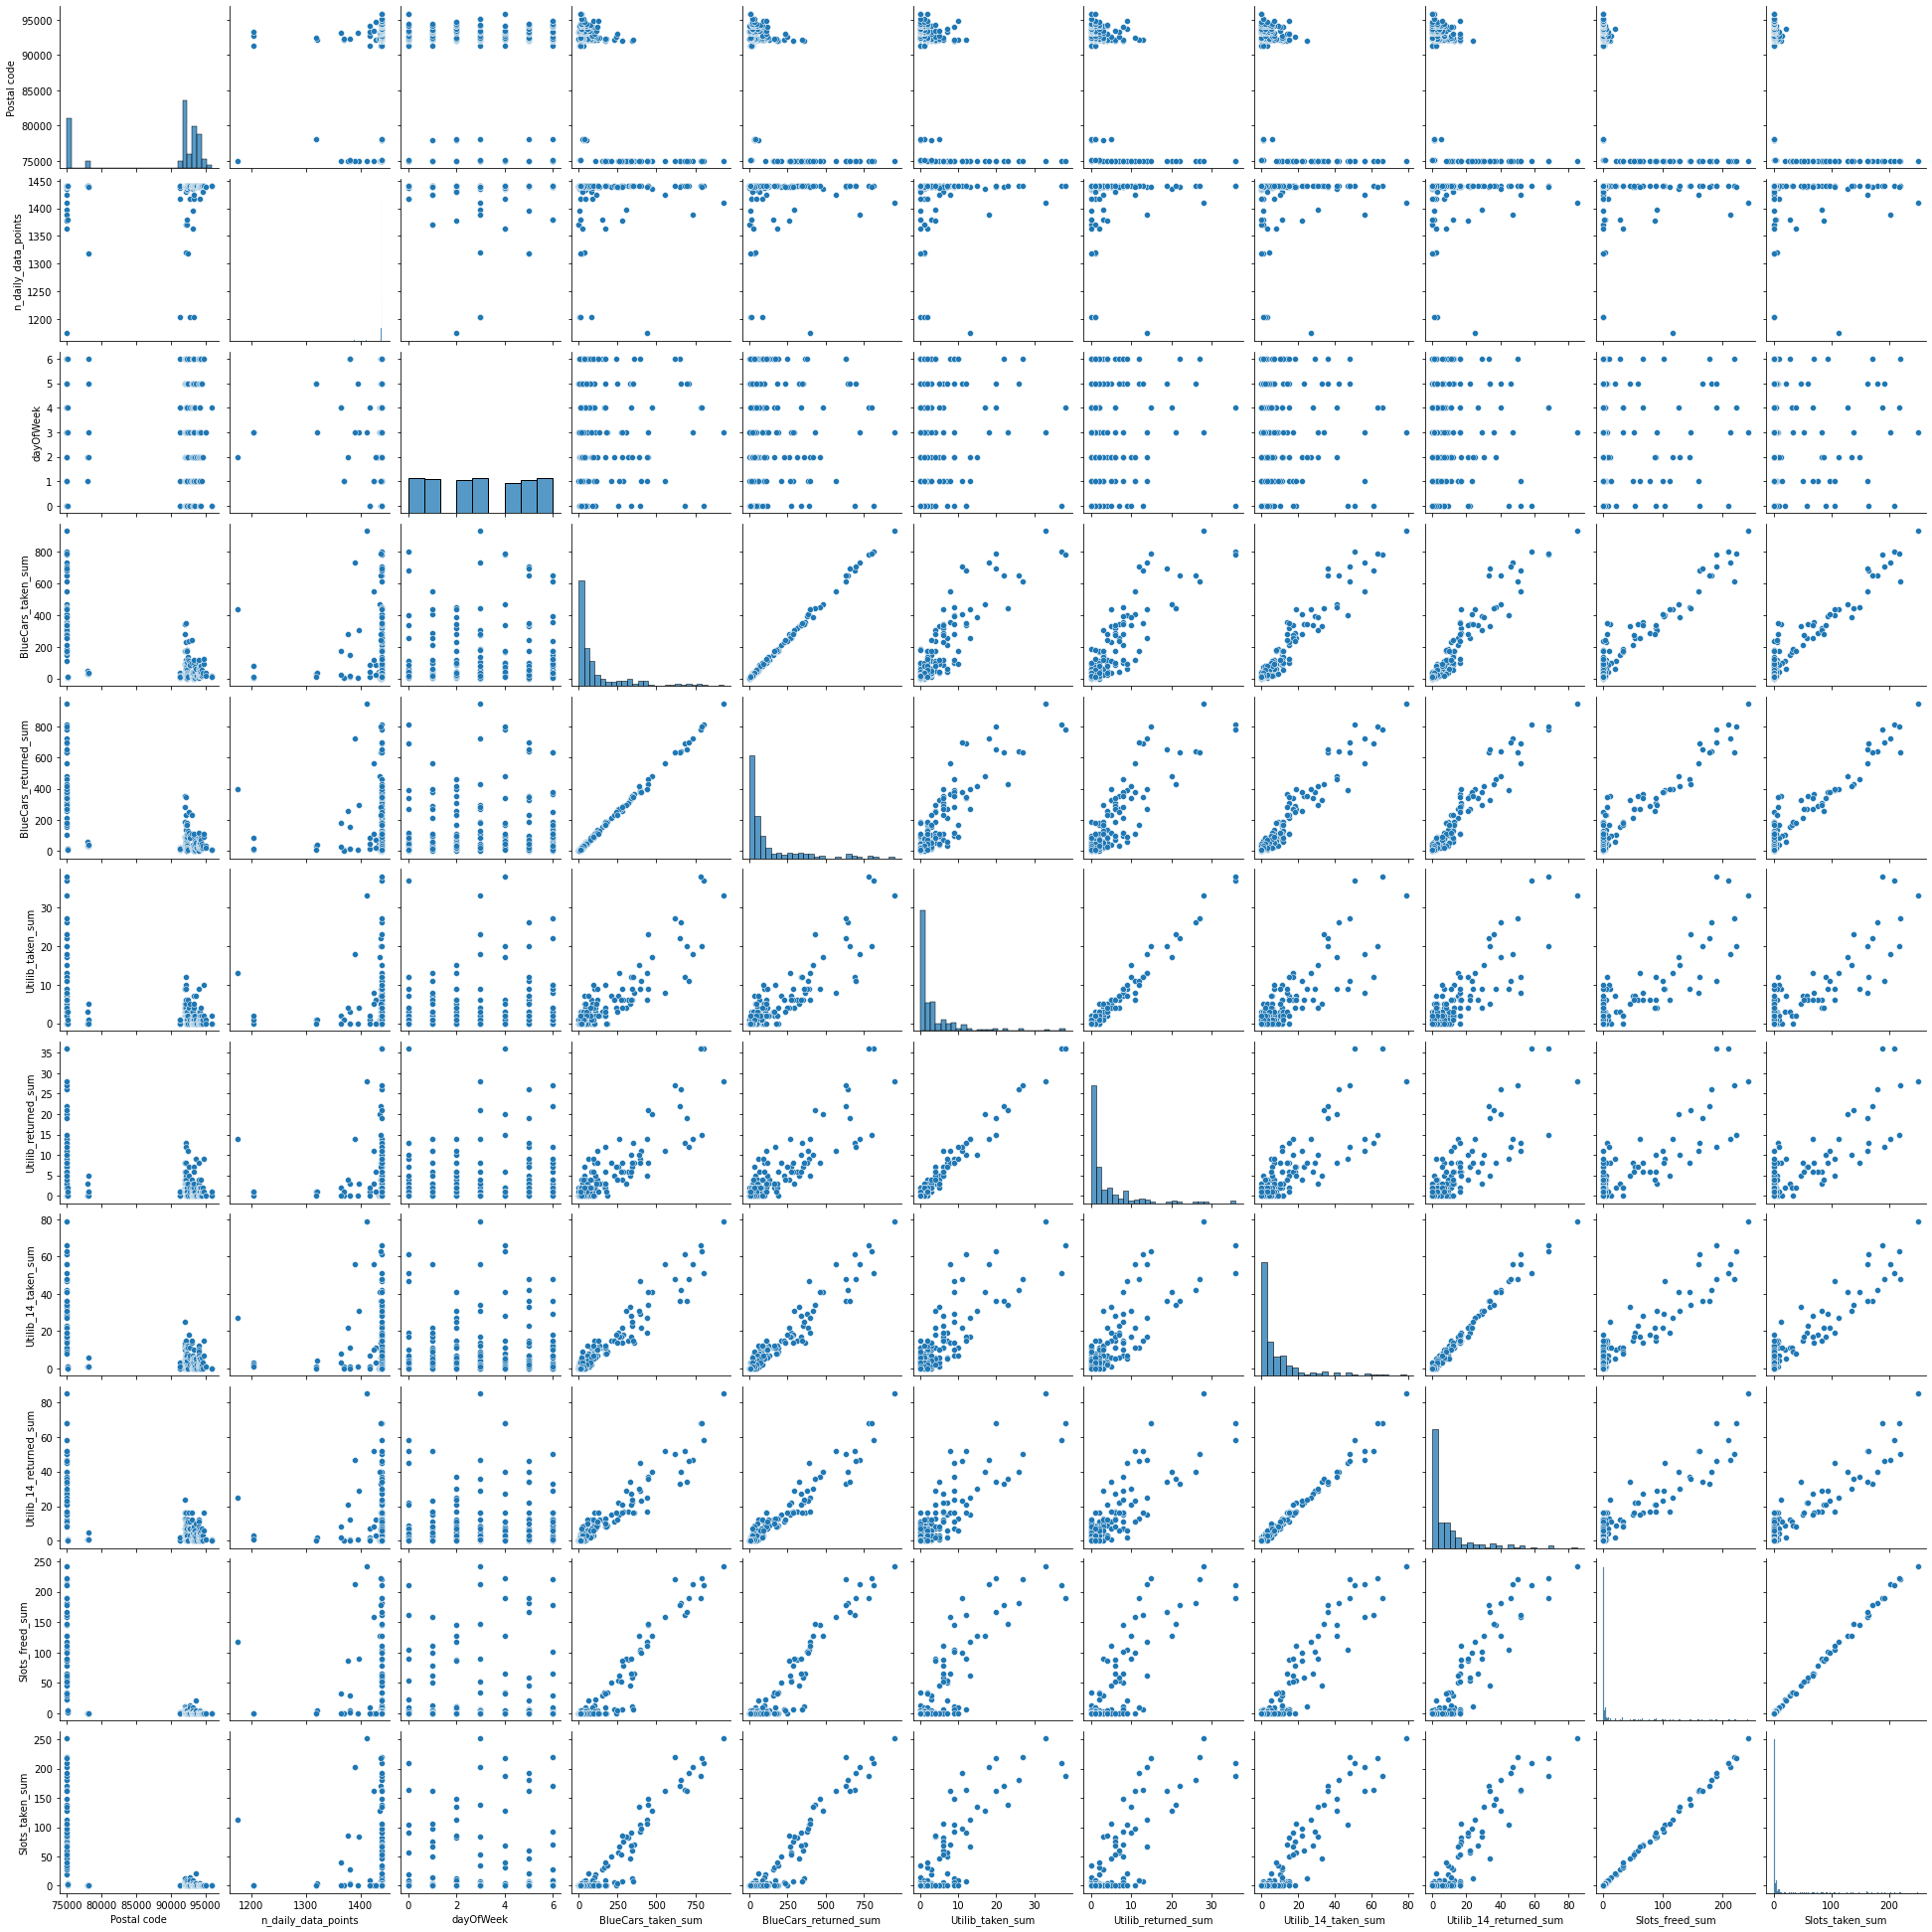

In [94]:
sns.pairplot(df_sample)
plt.show()

MULTIVARIATE ANALYSIS

In [52]:
# to napply LDA 
# assigning the first four columns of the dataset to X variable 
# while the values in the fifth column (labels) are assigned to the y variable.
#
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [53]:
#To divide data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
 # to do Feature scaling
# We now need to perform feature scaling by
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
# Peforming LDA
# 
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

ValueError: ignored

SAMPLING OF DATA

SYSTEMATIC Sampling method is applied


> Indented block



In [ ]:
# Systematic sampling  to get sample to use
# this is to be use since we do not have a pattern that our dataset follows, budget restrictions and simplicity in application

#step 1. the size of population is 16060

# STEP 2. sample size is 200

#step 3. 16060 /800. from this we shall choose every 80th item in our data

def df_sample(df, r, n):
    k = df.shape[0] // n

    b = [None] * n; a = r
    b[0] = a

    for i in np.arange(0, n):
        a = a + k

        if a > df.shape[0]:
            a = a - df.shape[0]

        b[i] = a

df_sample(df, r = 0, n = 200)
df_sample= df.iloc[0:16060:80]
df_sample.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
80,75001,3/25/2018,1380,6,weekend,150,154,3,3,11,12,29,28
160,75002,1/5/2018,1440,4,weekday,165,165,2,2,11,11,34,32
240,75002,3/29/2018,1440,3,weekday,186,186,0,0,9,9,34,34
320,75003,1/9/2018,1439,1,weekday,212,211,7,8,15,15,50,50


NORMALITY TEST

In [80]:
# Importing functions from numpy
from matplotlib import pyplot
from numpy.random import seed
from numpy.random import randn


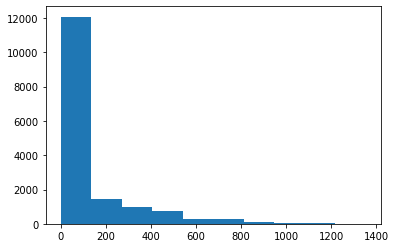

In [82]:
# histogram plot
pyplot.hist(df.BlueCars_taken_sum)
pyplot.show()
# from this we can see the the distribution does not exhibit the bell shape that is normally asscociated with the  normal distribution

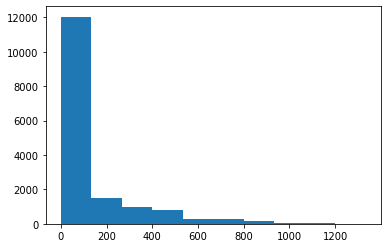

In [83]:
pyplot.hist(df.BlueCars_returned_sum)
pyplot.show()

# from this we can see the the distribution does not exhibit the bell shape that is normally asscociated with the  normal distribution

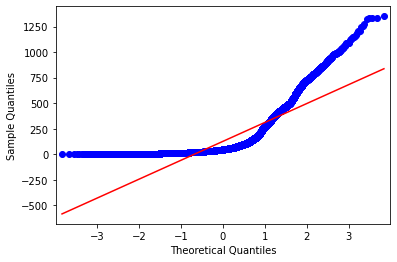

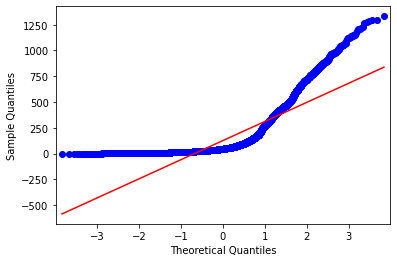

In [86]:
# use of Q-Q plot  to test on the distribution of the bluecar data
# Importing libraries to plot our Q-Q plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot


# q-q plot

qqplot(df.BlueCars_taken_sum, line='s')
pyplot.show()

qqplot(df.BlueCars_returned_sum, line='s')
pyplot.show()

# we can see that there major deviations witnessed


In [89]:
# Performing Shapiro wilk's test
# importing the shapiro function
from scipy.stats import shapiro 

# testing for normality
stat, p = shapiro(df.BlueCars_returned_sum)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.660, p=0.000
Sample does not look Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


IMPLEMENTING  SOLUTION

hypoyhesis testing

In [160]:
# claim is that most  BlueCars are taken at 75001
# step 1. Stating the null hypothesisand alternative
# H。: μ ≧ 125.926931
# Ha: μ < 125.926931

#Step 2.setting the significance level
#assume the normal or commonly used significance value of 5%

#step 3. to find the test statistic and the P- value
#to perform test statistic

zscore = ( 127.238806 - 125.926931 ) / 185.43
zscore



0.007074772151216095

In [165]:
import scipy.stats as stats
from scipy.stats import norm
prob = stats.norm.cdf(0.007074772151216095)
prob

0.5028224021906393

In [166]:
# step4. Drawing Conclusion 
# since the P-value is greater  than the significance level of 0.005  accept the null hypothesis

